#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 5
### Due: Monday, Feb 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 28th.

---

## Problem 1

We have seen that for some distributions, we can solve the for the maximum liklehood analytically.

a) Solve analytically for the maximum liklihood of the Poisson distribution.

b) Solve analytically for the maximum likelihood for a Gaussian where the uncertainties are *hetero*scedastic.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

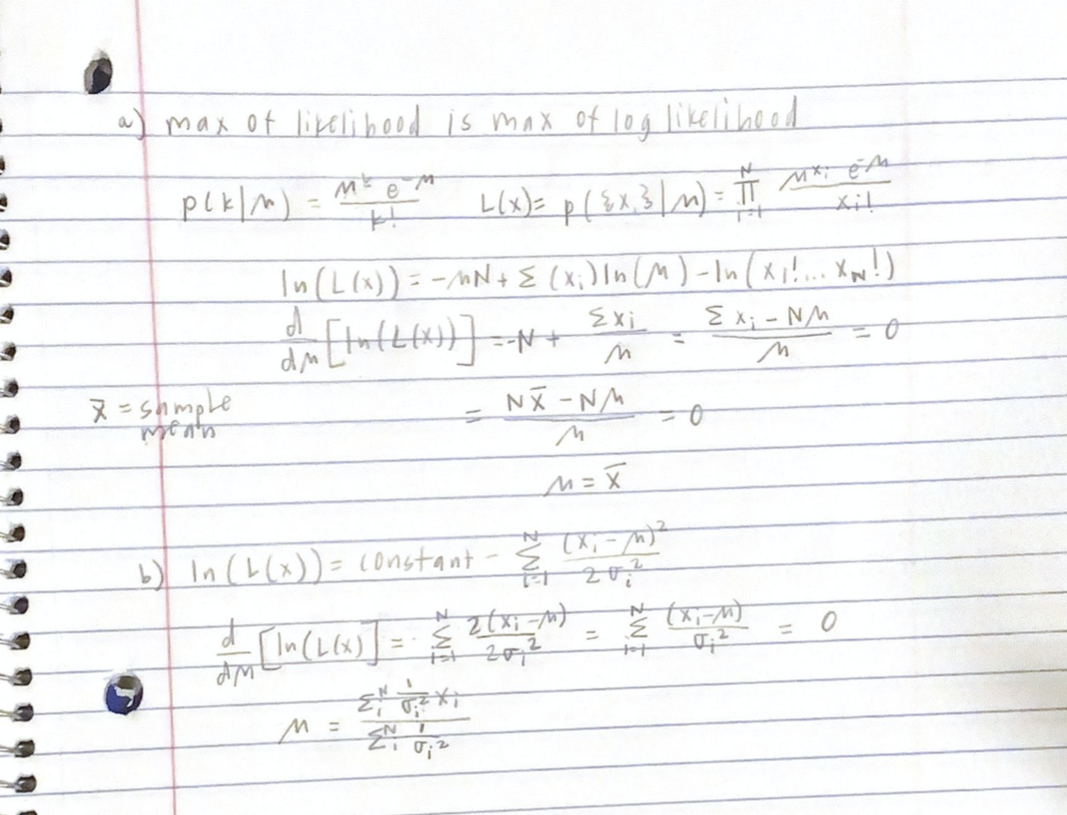

## Problem 2

In the lecture we have seen how data sets influenced by outliers can be fitted better when using the Huber loss function.
Another way to deal with outliers is called Winsorizing or winsorization and implemented in scipy (from scipy.stats.mstats import winsorize).
a) using the scipy online documentation, look up what this method means and write a small Python example.
b try to fit the data from our lecture, section "Fitting A Straight Line To Data", after applying Winsorizing, and describe 



### Solution



In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

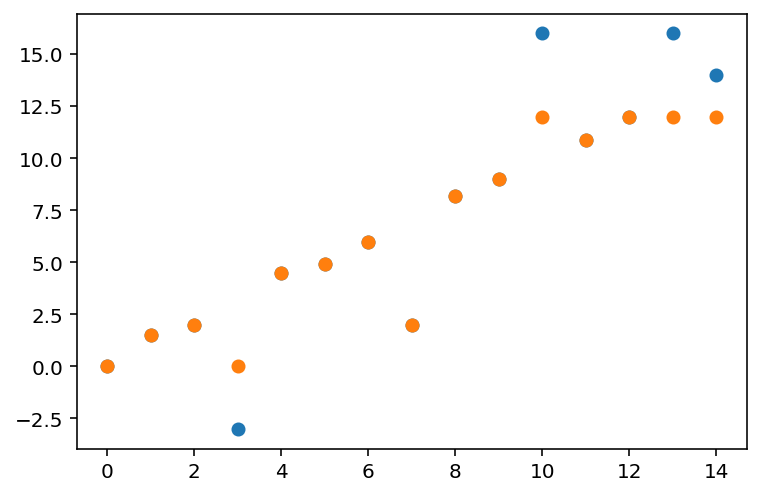

In [67]:
x = np.arange(0,15)
y = np.array([0,1.5,2,-3,4.5,4.9,6,2,8.2,9,16,10.9,12,16,14])
y_w = winsorize(y, limits=[0.1, 0.2])

plt.scatter(x,y, label='original')
plt.scatter(x,y_w, label='winsorized')
plt.show()

In [17]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
from astroML.datasets import fetch_hogg2010test

In [62]:
#------------------------------------------------------------
# Get data from AstroML: this includes outliers
data = fetch_hogg2010test()
x = data['x'] # x data
y = data['y'] # y data
dy = data['sigma_y'] # uncertainties on y data
x_w = winsorize(x, limits=[0.2,0.2])
y_w = winsorize(y, limits=[0.2,0.2])

# Define the standard squared-loss function.
# This is just another name for chi^2
def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)

# define a lambda function that defines the sum of squared errors.

# let's first exclude the outliers by chopping off the first 4 points.
f_squared = lambda beta: squared_loss(beta[0], beta[1], 
                                      x=x[4:], y=y[4:], 
                                      dy=dy[4:])

# define a lambda function that defines the sum of squared errors.
f_squared_outlier = lambda beta_outlier: squared_loss(beta_outlier[0], 
                                                      beta_outlier[1], 
                                                      x=x, y=y, dy=dy)

# we include the outliers
f_squared_winsor = lambda beta: squared_loss(beta[0], beta[1], 
                                             x=x_w, y=y_w, dy=dy)

#------------------------------------------------------------
# compute the maximum likelihood 
beta0 = (1, 30) # initial guess for a and b
beta_squared = optimize.fmin(f_squared, beta0)
beta_squared_outlier = optimize.fmin(f_squared_outlier, beta0)
beta_squared_winsor = optimize.fmin(f_squared_winsor, beta0)

Optimization terminated successfully.
         Current function value: 18.680770
         Iterations: 53
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 70
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 71.293743
         Iterations: 64
         Function evaluations: 122


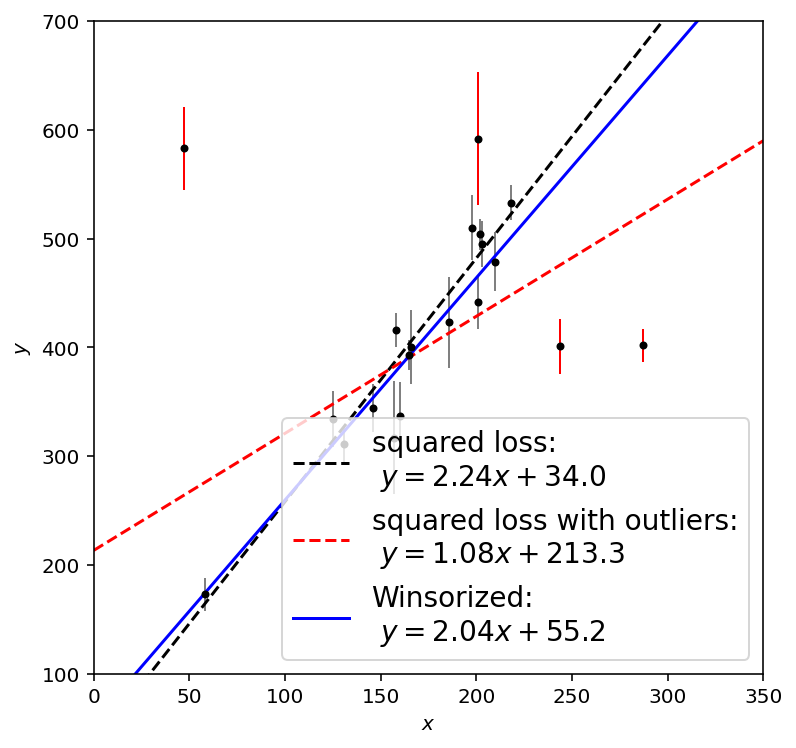

In [63]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# plot the data without outliers in gray
ax.errorbar(x[4:], y[4:], dy[4:], 
            fmt='.k', lw=1, ecolor='gray')
# plot the outliers in red
ax.errorbar(x[:4], y[:4], dy[:4], 
            fmt='.k', lw=1, ecolor='red')

x_fit = np.linspace(0, 350, 10)
# plot the regular fit from before without outliers
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], 
        ls='--', color='k',
        label="squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))
# plot the fit that includes outliers
ax.plot(x_fit, beta_squared_outlier[0] * x_fit + beta_squared_outlier[1], 
        ls='--', color='red',
        label="squared loss with outliers:\n $y=%.2fx + %.1f$" % tuple(beta_squared_outlier))
# plot the fit with the huber likelihood, downweighting outliers
ax.plot(x_fit, beta_squared_winsor[0] * x_fit + beta_squared_winsor[1], 
        ls='-', color='blue',
        label="Winsorized:\n $y=%.2fx + %.1f$" % tuple(beta_squared_winsor))

ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc=4, prop=dict(size=14))

plt.show()

The winsorizing improves the fit of the line by making it more closely resemble the black line. I tried different values for the limit. What is shown is 0.2 for each limit for both x and y. It is better than both 0.1 and 0.3. Although, both of these other 2 value are better than no winsorizing. I am not sure how you would optimize the limits without knowing the correct fit.